In [0]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv(r'HR.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Data Exploratory Analysis

### 1.See datatypes and check for null Entry
### 2. See categorical columns and convert to numerical if possible

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
print(df['Over18'].unique())
print(df['EmployeeCount'].unique())
print(df['EmployeeNumber'].unique(), len(df['EmployeeNumber'].unique()))
print(df['StandardHours'].unique())

['Y']
[1]
[   1    2    4 ... 2064 2065 2068] 1470
[80]


#Since the above shown columns contain same data ddor every row i.e. example so they do not affect the prediction


In [0]:
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

In [17]:
df.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [0]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [19]:
X.shape

(1470, 30)

In [20]:
y.shape

(1470,)

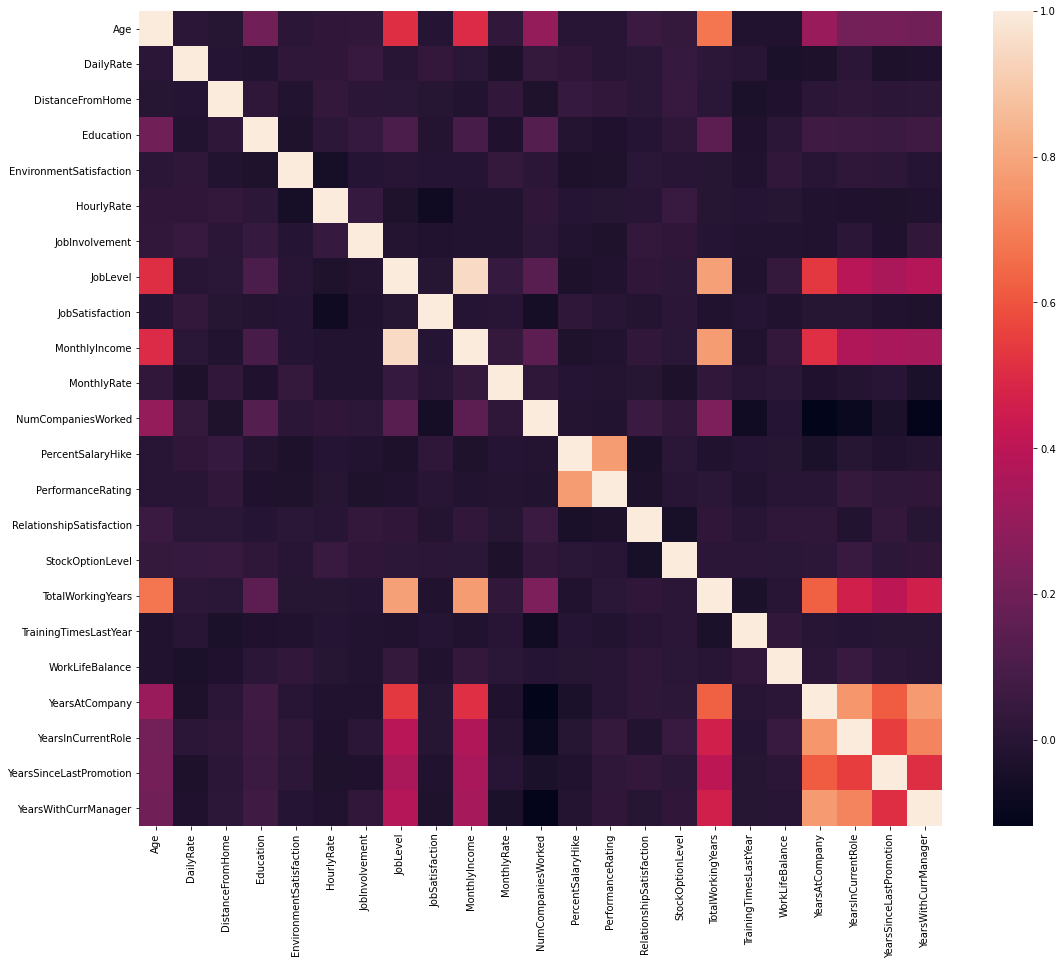

In [21]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=False)

# cannot deduce anything

## Using pandas.get_dummies
### To conver object to numerical data

imd_BusinessTravel=pd.get_dummies(df['BusinessTravel'],prefix='BusinessTravel',drop_first=True)
imd_Department=pd.get_dummies(df['Department'],prefix='Department',drop_first=True)
imd_EducationField=pd.get_dummies(df['EducationField'],prefix='EducationField',drop_first=True)
imd_Gender = pd.get_dummies(df['Gender'], prefix='Gender',drop_first=True)
imd_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole',drop_first=True)
imd_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus',drop_first=True)
imd_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime',drop_first=True)

In [0]:
# df1=pd.concat([df['BusinessTravel'],df['Department'],df['EducationField'],df['Gender'],df['JobRole'],df['MaritalStatus'],df['OverTime'],df.select_dtypes(['int64'])], axis=1)

In [25]:
# df1.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [27]:
# df['Department']

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [0]:
df1=X

In [29]:
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [30]:
df1.shape

(1470, 30)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


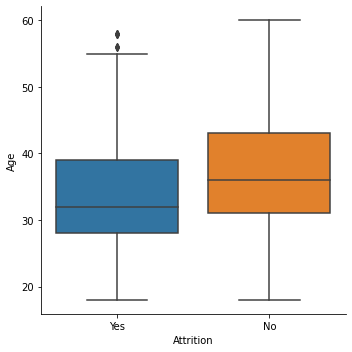

In [31]:
sns.factorplot(data=df,x='Attrition',y='Age',kind='box')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


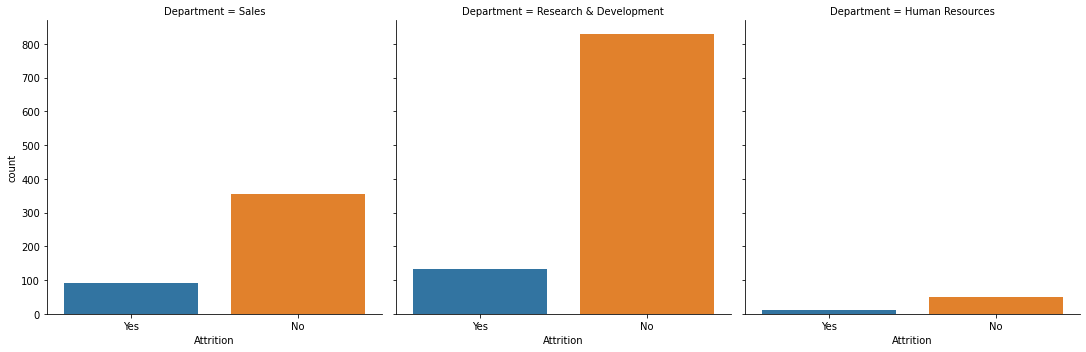

In [32]:
sns.factorplot(data=df,col='Department',x='Attrition',kind='count')

# Encoding

Converting target variable in numerical format

In [0]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()
y_std=le.fit_transform(df['Attrition'])
print(le.classes_)

['No' 'Yes']


In [35]:
y_std

array([1, 0, 1, ..., 0, 0, 0])

In [36]:
df1.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
!pip install missingno

In [0]:
import missingno as msno

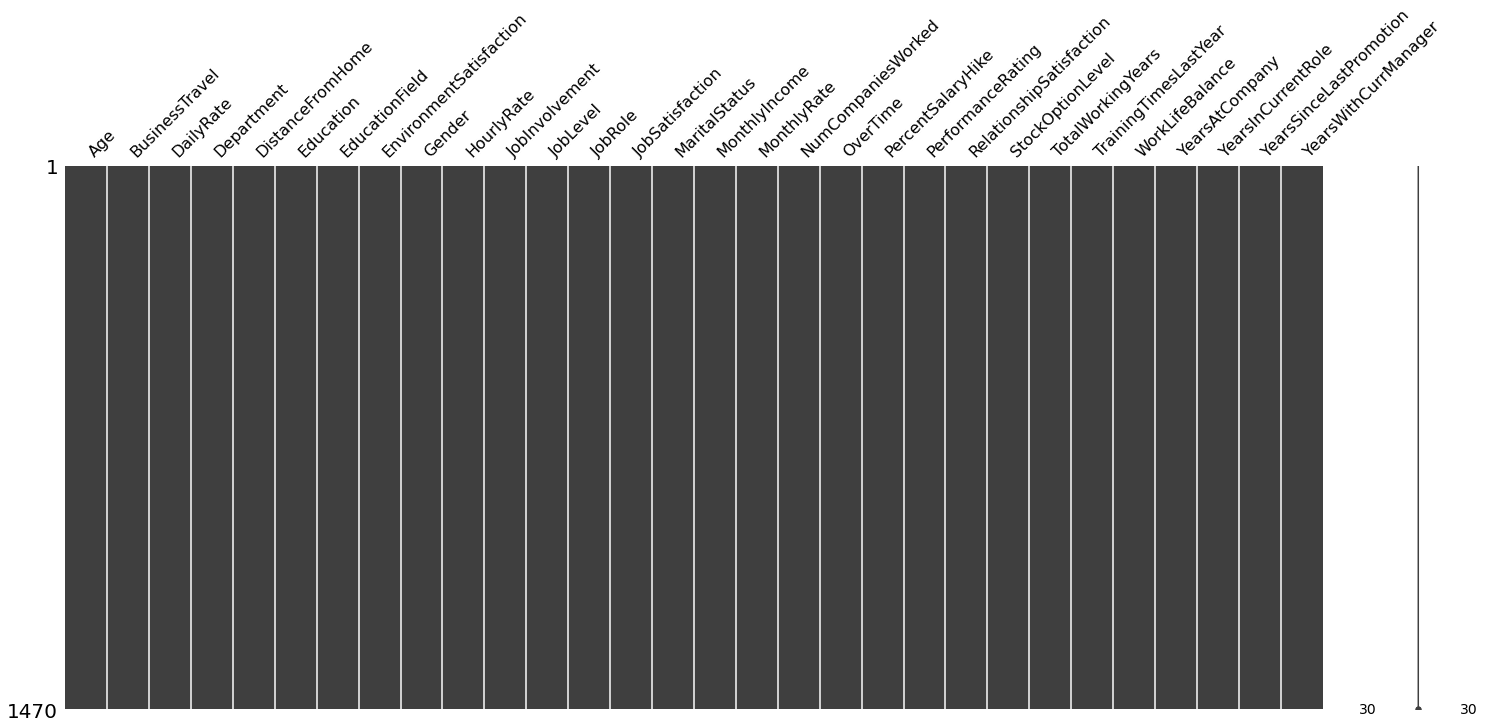

In [39]:
msno.matrix(df1)  # check for missing or null entry

# Check Categorical dataset and apply Label Encoder wherever possible

In [40]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [41]:
cat_col=df1.select_dtypes(['object'])
cat_col.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

# Encoder for X

Converting independent variable to numerical format

In [0]:
def transform(feature):
    df1[feature]=le.fit_transform(df1[feature])
    print(le.classes_)

In [43]:
for col in cat_col.columns:
    transform(col)

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [44]:
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## Categorical columns now have been transformed to numerical

The Machine Learning model can now understand the data and can make hypothesis

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1,y,test_size=0.3)

# Import models, techniques

Models:- SVM, Desicion Tree, Gradient boost classifier, Logistic regression etc.

techniques:- gridSearchCV, K-Fold, Accuray Metrics etc.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.metrics import classification_report

In [0]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [0]:
scalar = StandardScaler()
scaled_df1=scalar.fit_transform(df1)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(scaled_df1,y_std,test_size=0.3)

# Collecting accuracy scores

** Create list objects for all parameters and append it iteratively **

acc=[]
prec=[]
rec=[]
auroc=[]

In [0]:
acc=[]
prec=[]
rec=[]
auroc=[]

# Defining function for calculating accuracy

In [0]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

# Support Vector Classifier

In [0]:
scvm_vlf=SVC()

In [0]:
params_grid = {"C": [1,2,3,4,5,6,31],
               "kernel": ['rbf','linear','poly'],
               "degree": [1,2, 3,4]
              }

In [0]:
grid_search1 = GridSearchCV(scvm_vlf, params_grid,
                           n_jobs=-1,
                           verbose=1)

In [62]:
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   35.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 31], 'degree': [1, 2, 3, 4],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [63]:
grid_search1.best_score_

0.8688231115320862

In [64]:
grid_search1.best_estimator_.get_params()

{'C': 2,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [0]:
scv_clf =SVC(C= 3,degree= 1,kernel= 'rbf')

In [66]:
scv_clf.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_p1=scv_clf.predict(X_test)

In [0]:
    acc.append(accuracy_score(y_test,y_p1))
    prec.append(precision_score(y_test,y_p1))
    rec.append(recall_score(y_test,y_p1))
    auroc.append(roc_auc_score(y_test,y_p1))

In [69]:
acc

[0.8684807256235828]

In [70]:
prec

[0.6341463414634146]

In [71]:
confusion_matrix(y_test,y_p1)

array([[357,  15],
       [ 43,  26]])

In [72]:
print_score(scv_clf,X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9757

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       861
           1       0.99      0.86      0.92       168

    accuracy                           0.98      1029
   macro avg       0.98      0.93      0.95      1029
weighted avg       0.98      0.98      0.97      1029


Confusion Matrix: 
 [[860   1]
 [ 24 144]]

Average Accuracy: 	 0.8659
Accuracy SD: 		 0.0189


In [73]:
print_score(scv_clf,X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8685

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       372
           1       0.63      0.38      0.47        69

    accuracy                           0.87       441
   macro avg       0.76      0.67      0.70       441
weighted avg       0.85      0.87      0.85       441


Confusion Matrix: 
 [[357  15]
 [ 43  26]]



# Descion Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf_dt_temp=DecisionTreeClassifier()

In [0]:
params_grid_dt = {"criterion" : ['gini','entropy'],
                  "max_leaf_nodes" : list(range(2,75)),
                  "min_samples_split" : [2,3,4],
                  "min_samples_leaf" : list(range(5,50))
    
}

In [0]:
grid_search2=GridSearchCV(clf_dt_temp,params_grid_dt,n_jobs=-1,verbose=1)

In [78]:
grid_search2.fit(X_train,y_train)

Fitting 5 folds for each of 19710 candidates, totalling 98550 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 11260 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 27260 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 49660 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 78460 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 98550 out of 98550 | elapsed:  7.7min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid=...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_node

In [79]:
grid_search2.best_score_

0.8532607151314231

In [80]:
grid_search2.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 7,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [0]:
clf_dt=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=8,min_samples_leaf=24,min_samples_split=2)

In [82]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=24, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_p2=clf_dt.predict(X_test)

In [0]:
    acc.append(accuracy_score(y_test,y_p2))
    prec.append(precision_score(y_test,y_p2))
    rec.append(recall_score(y_test,y_p2))
    auroc.append(roc_auc_score(y_test,y_p2))

In [85]:
acc

[0.8684807256235828, 0.8344671201814059]

In [86]:
print_score(clf_dt,X_train,y_train,X_test,y_test,train=True)

Train Result:

accuracy score: 0.8698

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.93       861
           1       0.71      0.34      0.46       168

    accuracy                           0.87      1029
   macro avg       0.80      0.66      0.69      1029
weighted avg       0.86      0.87      0.85      1029


Confusion Matrix: 
 [[838  23]
 [111  57]]

Average Accuracy: 	 0.8620
Accuracy SD: 		 0.0265


In [87]:
print_score(clf_dt,X_train,y_train,X_test,y_test,train=False)

Test Result:

accuracy score: 0.8345

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       372
           1       0.44      0.22      0.29        69

    accuracy                           0.83       441
   macro avg       0.65      0.58      0.60       441
weighted avg       0.80      0.83      0.81       441


Confusion Matrix: 
 [[353  19]
 [ 54  15]]



# Logistic Regression

In [0]:
clf_lr_temp=LogisticRegression()

In [0]:
params_grid_lr1={"penalty" : ['l2'],
                "C" : [0.001,0.009,0.01,0.09,0.1,0.9,1],
                "solver" : ['newton-cg', 'lbfgs', 'sag','saga']
    
}

In [0]:
grid_search3=GridSearchCV(clf_lr_temp,params_grid_lr1,n_jobs=-1,verbose=1)

In [91]:
grid_search3.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 0.1, 0.9, 1],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [92]:
grid_search3.best_score_

0.8649348804167654

In [93]:
grid_search3.best_estimator_.get_params()

{'C': 0.09,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [0]:
params_grid_lr2={"penalty" : ['l1'],
                "C" : [0.001,0.009,0.01,0.09,0.1,0.9,0.8,0.95,1],
                "solver" : ['liblinear', 'saga']
                                                }

In [0]:
grid_search4=GridSearchCV(clf_lr_temp,params_grid_lr2,n_jobs=-1)

In [96]:
grid_search4.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 0.1, 0.9, 0.8, 0.95,
                               1],
                         'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
grid_search4.best_score_

0.8649254084773859

In [98]:
grid_search4.best_estimator_.get_params()

{'C': 0.9,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [0]:
clf_lr=LogisticRegression(C=0.09,penalty='l2',solver='newton-cg')

In [100]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=0.09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_p3=clf_lr.predict(X_test)

In [0]:
    acc.append(accuracy_score(y_test,y_p2))
    prec.append(precision_score(y_test,y_p2))
    rec.append(recall_score(y_test,y_p2))
    auroc.append(roc_auc_score(y_test,y_p2))

In [103]:
d={'Modelling Algo':['SVC','Desicion Tree','Logistic Regression'],'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,SVC,0.868481,0.634146,0.376812,0.668245
1,Desicion Tree,0.834467,0.441176,0.217391,0.583158
2,Logistic Regression,0.834467,0.441176,0.217391,0.583158
